In [89]:
import pandas as pd
import datetime
from datetime import date
import numpy as np
import calendar
import matplotlib.pyplot as plot

In [90]:
#Following code is specific to google notebook
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
copied_path_car ='/content/drive/MyDrive/BAT502_Project/tucson_car_accidents.csv' # copy file path for Car Accidents in Tucson
copied_path_rain = '/content/drive/MyDrive/BAT502_Project/tucson_rain.csv' # copy file path for rain amount in Tucson

In [92]:
#read in data
car_accidents = pd.read_csv(copied_path_car)
rain = pd.read_csv(copied_path_rain, sep=",",header=0)

In [93]:
rain.head()

,readingId,gaugeId,gaugeRevisionId,remarks,readingDate,readingHour,readingMinute,quality,rainAmount,snowDepth,snowAccumulation,createdDate,brand,model,description,gaugeType,gaugeTypeOther,lat,lng
0,2426997,2348,10444,Davis Vantage VUE weather station daily high a...,2018-01-01,7,0,Good,0.0,NaN,NaN,2017-08-04,Davis,Vantage Vue,NaN,TippingBucketOrElectronic,NaN,32.469571,-110.958823
1,2426998,8062,8062,NaN,2018-01-01,7,0,Good,0.0,NaN,NaN,2014-03-04,Tru-Chek,NaN,NaN,TruChek,NaN,32.030822,-111.277656
2,2427000,3161,10648,NaN,2018-01-01,4,20,Good,0.0,NaN,NaN,2017-12-01,Acu-Rite Pro Weather Center,01536,Acurite Pro. Weather Center,TippingBucketOrElectronic,NaN,32.374627,-111.021002
3,2427015,3075,3075,NaN,2018-01-01,7,0,Good,0.0,NaN,NaN,2008-07-15,?,NaN,NaN,TruChek,NaN,32.145857,-111.069297
4,2427019,5812,5812,NaN,2018-01-01,6,0,Good,0.0,NaN,NaN,2011-07-01,Productive Alternatives,NaN,NaN,TruChek,NaN,32.271162,-111.030239


In [94]:
accidents_aggregate = (car_accidents.groupby(by=['Month', 'Year'],as_index=False)['Hour'].count()
.reindex(columns=car_accidents.columns) )
accidents_aggregate=accidents_aggregate[['Year','Month','Hour']]
accidents_aggregate = accidents_aggregate.set_axis(['Year','Month', 'Number_of_Collisions'], axis=1, inplace=False)
accidents_aggregate.Year=accidents_aggregate.Year.astype('int')

In [ ]:
rain['Year']=pd.DatetimeIndex(rain['readingDate']).year
rain['month']=pd.DatetimeIndex(rain['readingDate']).month
rain['Month'] = 0
for i in range(len(rain)):
  rain['Month'][i] = calendar.month_abbr[rain['month'][i]]
rain_aggregate = (rain.groupby(by=['Year', 'Month'],as_index=False)['rainAmount'].mean()
.reindex(columns=rain.columns) )
rain_aggregate = rain_aggregate[['Year', 'Month', 'rainAmount']]
rain_aggregate = rain_aggregate.set_axis(['Year', 'Month', 'rainAmount'], axis=1, inplace=False)
rain_aggregate.Year=rain_aggregate.Year.astype('int')

In [96]:
# rain=rain[rain["createdDate"]<"2018-01-01"]
# rain=rain[rain["quality"].str.upper()=="GOOD"]
# gauges, dates=set(rain["gaugeId"]), list(set(rain["readingDate"])); dates.sort() #add missing zeros and make a gauge, dates matrix
# gauge_rain=pd.DataFrame(np.zeros((len(gauges), len(dates))),index=gauges, columns=dates)
# for i in rain.index:
#     gauge_rain.loc[rain.loc[i,"gaugeId"], rain.loc[i,"readingDate"]] =rain.loc[i, "rainAmount"]
# temp_rain=gauge_rain.reset_index()     # convert the matrix in a (gauge, date) list format
# temp_rain.rename({"index":"gaugeId"},axis=1,inplace=True)
# all_dates=[]
# for col in temp_rain.columns[1:]:
#       curr=temp_rain[["gaugeId",col]]
#       curr.rename({col:"rainAmount"},axis=1,inplace=True)
#       curr["readingDate"]=col
#       all_dates=all_dates+[curr]
# full_rain=pd.concat(all_dates,axis=0,join="inner")
# full_rain=full_rain.reset_index()
# dates=full_rain["readingDate"].str.split("-")
# full_rain["Year"]=[dates[i][0] for i in dates.index]
# full_rain["Month"]=[dates[i][1] for i in dates.index]
# full_rain["Day"]=[dates[i][2] for i in dates.index]
# gauge_info=rain[["gaugeId","lat","lng","gaugeType"]].drop_duplicates()
# full_rain=pd.merge(full_rain,gauge_info,on="gaugeId",how="inner")

In [97]:
# full_rain.head()
# full_rain.shape

In [100]:
rain_aggregate = (rain.groupby(by=['Year', 'Month'],as_index=False)['rainAmount'].mean()
.reindex(columns=rain.columns) )
rain_aggregate = rain_aggregate[['Year', 'Month', 'rainAmount']]
rain_aggregate = rain_aggregate.set_axis(['Year', 'Month', 'rainAmount'], axis=1, inplace=False)
rain_aggregate.Year=rain_aggregate.Year.astype('int')

In [107]:
accidents_aggregate = accidents_aggregate[accidents_aggregate['Year'].isin([2018, 2019, 2020, 2021])]
accidents_aggregate = accidents_aggregate[accidents_aggregate['Month'].isin(['Jun', 'Jul', 'Aug'])]
rain_aggregate = rain_aggregate[rain_aggregate['Year'].isin([2018, 2019, 2020, 2021])]
rain_aggregate = rain_aggregate[rain_aggregate['Month'].isin(['Jun', 'Jul', 'Aug'])]
accidents_aggregate.reset_index(inplace=True)
rain_aggregate.reset_index(inplace=True)

In [108]:
rain_aggregate.shape

(12, 4)

In [109]:
df_new = pd.merge(accidents_aggregate, rain_aggregate, on=['Year','Month'], how='inner')

In [ ]:
rain_aggregate['monthYear'] = 1
for i in range(len(rain_aggregate)):
  rain_aggregate['monthYear'][i] = str(rain_aggregate['Year'][i]) + ' - ' + str(rain_aggregate['Month'][i])
accidents_aggregate['monthYear'] = 1
for i in range(len(accidents_aggregate)):
  accidents_aggregate['monthYear'][i] = str(accidents_aggregate['Year'][i]) + ' - ' + str(accidents_aggregate['Month'][i])

In [111]:
rain_aggregate.head()

,index,Year,Month,rainAmount,monthYear
0,1,2018,Aug,0.110525,2018 - Aug
1,5,2018,Jul,0.115952,2018 - Jul
2,6,2018,Jun,0.073928,2018 - Jun
3,13,2019,Aug,0.096667,2019 - Aug
4,17,2019,Jul,0.057269,2019 - Jul


In [112]:
accidents_aggregate.head()

,index,Year,Month,Number_of_Collisions,monthYear
0,5,2018,Aug,500,2018 - Aug
1,6,2019,Aug,560,2019 - Aug
2,7,2020,Aug,457,2020 - Aug
3,8,2021,Aug,499,2021 - Aug
4,24,2018,Jul,454,2018 - Jul


In [113]:
rain_accidents = pd.merge(rain_aggregate, accidents_aggregate, on = ["monthYear"], how = 'inner')
rain_accidents.head(48)

,index_x,Year_x,Month_x,rainAmount,monthYear,index_y,Year_y,Month_y,Number_of_Collisions
0,1,2018,Aug,0.110525,2018 - Aug,5,2018,Aug,500
1,5,2018,Jul,0.115952,2018 - Jul,24,2018,Jul,454
2,6,2018,Jun,0.073928,2018 - Jun,29,2018,Jun,415
3,13,2019,Aug,0.096667,2019 - Aug,6,2019,Aug,560
4,17,2019,Jul,0.057269,2019 - Jul,25,2019,Jul,468
5,18,2019,Jun,0.001400,2019 - Jun,30,2019,Jun,462
6,25,2020,Aug,0.047931,2020 - Aug,7,2020,Aug,457
7,29,2020,Jul,0.076233,2020 - Jul,26,2020,Jul,407
8,30,2020,Jun,0.001558,2020 - Jun,31,2020,Jun,421
9,37,2021,Aug,0.206879,2021 - Aug,8,2021,Aug,499


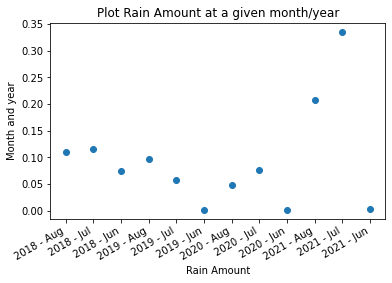

In [114]:
# Scatter plot for Rain Amount

plot.scatter( rain_accidents['monthYear'],rain_accidents['rainAmount'])

plot.title('Plot Rain Amount at a given month/year')

plot.xlabel('Rain Amount')

plot.ylabel('Month and year')

plot.gcf().autofmt_xdate()

plot.show()

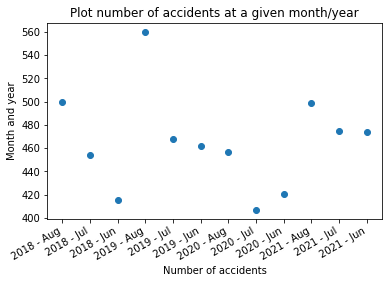

In [115]:
# Scatter plot for Number of collisions

plot.scatter( rain_accidents['monthYear'],rain_accidents['Number_of_Collisions'])

plot.title('Plot number of accidents at a given month/year')

plot.xlabel('Number of accidents')

plot.ylabel('Month and year')

plot.gcf().autofmt_xdate()

plot.show()

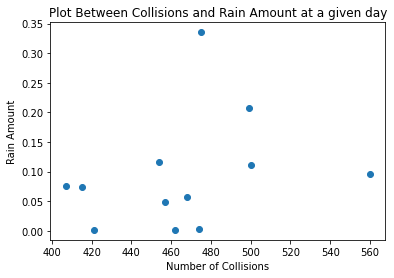

In [116]:
# Scatter plot for Number of collisions vs Rain Amount
plot.scatter(df_new['Number_of_Collisions'], df_new['rainAmount'])

plot.title('Plot Between Collisions and Rain Amount at a given day')

plot.xlabel('Number of Collisions')

plot.ylabel('Rain Amount')

plot.show()